# 1 - Introductory Example: Fixed-Tilt simple setup

This jupyter journal will walk us through the creation of the most basic fixed-tilt simulation possible with bifacialvf.
We will simulate a 1-up landscape system over a white rooftop.

Steps include:

<ol>
    <li> <a href='#step1'> Create a folder for your simulation, and Load bifacialvf </a></li> 
    <li> <a href='#step2'> Download Weather File and Read </a></li> 
    <li> <a href='#step3'> Set all your Parameters </a></li> 
    <li> <a href='#step4'> Run simulation </a></li> 
    <li> <a href='#step5'> Read Results </a></li> 
    <li> <a href='#step6'> Plot Results </a></li> 
</ol>


<a id='step1'></a>


## 1. Create a folder for your simulation, and load bifacial_radiance 

First let's set the folder where the simulation will be saved. By default, this is the TEMP folder in the bifacialvf distribution.

The lines below find the location of the folder relative to this Jupyter Journal. You can alternatively point to an empty directory (it will open a load GUI Visual Interface) or specify any other directory in your computer, for example:

#### testfolder = r'C:\Users\sayala\Documents\bifacialVFResults'



In [1]:
from pathlib import Path
import os

# IO Files
testfolder = Path().resolve().parent.parent / 'bifacialvf' / 'TEMP' / 'Tutorial_01'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

This will load bifacial_radiance and other libraries from python that will be useful for this Jupyter Journal:

In [2]:
import bifacialvf

<a id='step2'></a>

## 2. Download and Load Weather Files

There are various options provided in bifacialVF to load weatherfiles. getEPW is useful because you just set the latitude and longitude of the location and it donwloads the meteorologicla data for any location. 

In [3]:
# Download and Read input
TMYtoread=bifacialvf.getEPW(lat=37.5407,lon=-77.4360, path = testfolder)
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread)


path = C:\Users\sayala\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Tutorial_01
Getting weather file: USA_VA_Richmond.724010_TMY2.epw
 ... OK!


We can also specify if data is right labeled (like TMY3 files), or left labeled (like SAM input files) to calculate teh sun position. By default, 'TMY3' format is selected 

In [4]:
deltastyle = 'TMY3'  # 

<a id='step3'></a>

# 3. Set Parameters

In [5]:
# Variables
tilt = 10                   # PV tilt (deg)
sazm = 180                  # PV Azimuth(deg) or tracker axis direction
albedo = 0.62               # ground albedo
clearance_height=0.4
pitch = 1.5                   # row to row spacing in normalized panel lengths. 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
sensorsy = 6                # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)

# Calculate PV Output Through Various Methods    
# This variables are advanced and explored in other tutorials.
#calculateBilInterpol = True         # Only works with landscape at the moment.
#calculatePVMismatch = True
#portraitorlandscape='landscape'   # portrait or landscape
#cellsnum = 72
#bififactor = 1.0
#agriPV = True                       # Returns ground irradiance values

# Tracking instructions
tracking=False
backtrack=False
limit_angle = 60



<a id='step4'></a>

# 4. Run Simulation

In [17]:
writefiletitle = os.path.join(testfolder, 'Tutorial1_Results.csv')
#myTMY3 = myTMY3.iloc[0:24].copy()  # Simulate just the first 24 hours of the data file for speed on this example
bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
         tilt=tilt, sazm=sazm, pitch=pitch, clearance_height=clearance_height, 
         rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
         PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
         albedo=albedo, tracking=tracking, backtrack=backtrack, 
         limit_angle=limit_angle, deltastyle=deltastyle)



Calculating Sun position with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   RICHMOND
Lat:  37.5  Long:  -77.33  Tz  -5.0
Parameters: tilt:  10   Sazm:  180     Clearance_Height :  0.4   Pitch:  1.5   Row type:  interior   Albedo:  0.62
Saving into C:\Users\sayala\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Tutorial_01\Tutorial1_Results.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.4510244972733475
Actual distance between rows =  0.515192246987792
 


100%|█████████████████████████████████████████████████████████████████████████████| 8760/8760 [00:32<00:00, 271.91it/s]

Finished


<a id='step5'></a>

# 5. Load the results from the resultfile


In [23]:
from bifacialvf import loadVFresults
(data, metadata) = loadVFresults(writefiletitle)

# calculate average front and back global tilted irradiance across the module chord
data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)


# Print the annual bifacial ratio
frontIrrSum = data['GTIFrontavg'].sum()
backIrrSum = data['GTIBackavg'].sum()
print('The bifacial ratio for ground clearance {} and rtr spacing {} is: {:.1f}%'.format(clearance_height,pitch,backIrrSum/frontIrrSum*100))


The bifacial ratio for ground clearance 0.4 and rtr spacing 1.5 is: 15.6%


In [24]:
data

,date,DNI,DHI,albedo,decHRs,ghi,inc,zen,azm,pvFrontSH,...,No_5_RowFrontGTI,No_6_RowFrontGTI,No_1_RowBackGTI,No_2_RowBackGTI,No_3_RowBackGTI,No_4_RowBackGTI,No_5_RowBackGTI,No_6_RowBackGTI,GTIFrontavg,GTIBackavg
0,1965-01-01 08:00:00-05:00,39,14,0.62,7.5,15.513732,82.593396,87.775583,121.509048,0.548363,...,15.829189,15.842958,2.720917,2.481854,2.416821,2.522916,2.717758,2.898926,14.254926,2.626532
1,1965-01-01 09:00:00-05:00,239,69,0.62,8.5,110.414861,73.784823,80.021191,129.418096,0.069185,...,123.726823,123.846346,11.020498,10.114008,9.859451,10.305024,11.102256,11.803189,118.105112,10.700738
2,1965-01-01 10:00:00-05:00,3,88,0.62,9.5,88.946539,64.007516,71.608218,140.711789,0.000000,...,84.250417,84.202642,16.495967,15.009433,14.654344,15.291137,16.442516,17.544095,83.942392,15.906249
3,1965-01-01 11:00:00-05:00,7,156,0.62,10.5,158.940463,56.279828,65.161237,153.848480,0.000000,...,153.485293,153.416869,28.336481,26.117027,25.902736,27.229144,29.042151,30.540968,152.929903,27.861418
4,1965-01-01 12:00:00-05:00,0,186,0.62,11.5,186.000000,51.542384,61.326212,168.706528,0.000000,...,179.177936,179.103318,33.564375,31.095536,30.913941,32.320596,34.215246,35.894571,178.506523,33.000711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,1970-12-31 13:00:00-05:00,1,242,0.62,12.5,242.488791,50.775762,60.738863,184.650638,0.000000,...,237.588996,237.509847,42.080540,39.375203,39.529076,41.388331,43.496027,45.244617,236.722121,41.852299
4378,1970-12-31 14:00:00-05:00,0,240,0.62,13.5,240.000000,53.952112,63.285848,200.008098,0.000000,...,236.276011,236.199294,41.070504,38.393510,38.647338,40.762078,43.032810,44.682666,235.428144,41.098151
4379,1970-12-31 15:00:00-05:00,3,175,0.62,14.5,176.090220,60.518083,68.690439,213.908216,0.000000,...,172.086086,172.017603,30.336585,27.897848,27.644687,29.207474,31.419900,33.130570,171.478063,29.939511
4380,1970-12-31 16:00:00-05:00,2,114,0.62,15.5,114.472518,69.513942,76.334160,225.953424,0.000000,...,111.453039,111.402451,19.642107,17.846724,17.380480,18.083551,19.419690,20.752516,111.068916,18.854178


# 6. Plot some results 

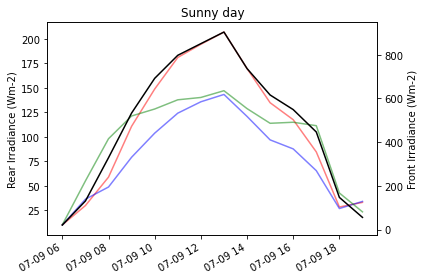

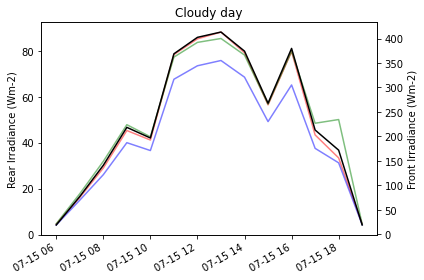

In [41]:
# plot the rear irradiance distribution for a single point in time. 1999-07-06
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data['GTIBackstd'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].std(axis=1)
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
singleday = (data.index > '2021-07-09') & (data.index<'2021-07-10')
singleday2 = (data.index > '2021-07-15') & (data.index<'2021-07-16')

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax1.plot(data.index[singleday],data['GTIFrontavg'][singleday],'k')
ax1.set_ylabel('Front Irradiance (Wm-2)')
ax.set_ylabel('Rear Irradiance (Wm-2)')
ax.plot(data.index[singleday], data['No_1_RowBackGTI'][singleday],'r' , alpha =0.5)
ax.plot(data.index[singleday], data['No_2_RowBackGTI'][singleday], 'b', alpha = 0.5)
ax.plot(data.index[singleday], data['No_6_RowBackGTI'][singleday], 'g', alpha = 0.5)
ax.set_title('Sunny day')
fig.autofmt_xdate()
fig.tight_layout()


fig2, ax2 = plt.subplots()
ax3 = ax2.twinx()
ax3.plot(data.index[singleday2],data['GTIFrontavg'][singleday2],'k')
ax3.set_ylabel('Front Irradiance (Wm-2)')
ax2.set_ylabel('Rear Irradiance (Wm-2)')
ax2.plot(data.index[singleday2], data['No_1_RowBackGTI'][singleday2],'r' , alpha =0.5)
ax2.plot(data.index[singleday2], data['No_2_RowBackGTI'][singleday2], 'b', alpha = 0.5)
ax2.plot(data.index[singleday2], data['No_6_RowBackGTI'][singleday2], 'g', alpha = 0.5)
ax2.set_title('Cloudy day')
fig2.autofmt_xdate()
fig2.tight_layout()
